# General

## Introduction

Notebook containing **software-control** EEG processing pipeline. Goal is a general purpose discrimination system for EEG data, ie. the ability to classify sample EEG traces to a few given categories.

*Authors: Dasheng Bi*

## Quick Operations

In [57]:
# Libraries for data import, preprocessing
import numpy as np
import pandas as pd

# Visualization, clustering
import seaborn as sns
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Path properties
train_root = 'csv_sa_1/'
test_root = 'csv_sa_1/'
prefix = 'db-rec-'
label = ['GO_', 'STOP_']
train_number = range(1, 6)
test_number = range(1, 6)
suffix = '.csv'

# Data properties
SAMPLE_FREQ = 256
INTERVAL = 0.4
# N_COMPONENTS = 4 # raw data
N_COMPONENTS = 20 # filtered DTABG components
TRAIN_SAMPLES = 60
TEST_SAMPLES = 36

########################################################################

# Audio
from scipy.io import wavfile
from scipy import signal

# Audio Path Properties
audio_root = 'sound/'
audio_prefix = ''
audio_suffix = '.wav'

# Audio Data Properties
AUDIO_SAMPLE_FREQ = 44100
AUDIO_EVENT_THRESHOLD_LO = 1
AUDIO_EVENT_THRESHOLD_HI = 1000
MIN_AUDIO_EVENT_LENGTH = 10000

########################################################################
# A note on labels: 1 is "go," 0 is "stop."

# Data Loading, Preprocessing

## Imports

In [ ]:
# Libraries for data import, preprocessing
import numpy as np
import pandas as pd

In [ ]:
# Visualization, clustering
import seaborn as sns
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

## Path Configuration

In [ ]:
# Path properties
root = 'csv1/'
prefix = 'db-rec-'
label = ['GO_', 'STOP_']
number = range(1, 6)
suffix = '.csv'

## Read Data, Select Columns

### General Attributes

In [ ]:
SAMPLE_FREQ = 256
INTERVAL = 0.5

# N_COMPONENTS = 4 # raw data
N_COMPONENTS = 20 # filtered DTABG components

TRAIN_SAMPLES = 60
TEST_SAMPLES = 8

### Explore Data Format

In [ ]:
path = root + prefix + label[0] + str(number[0]) + suffix
df = pd.read_csv(path)
print(df.columns)
df = df.drop(columns=df.columns[21:])
print(df.columns)
df = df.drop(columns=df.columns[0])
print(df.columns)
print(df.shape)

### Read in Training Data

In [45]:
data_stack = np.empty((0, int(INTERVAL * SAMPLE_FREQ * N_COMPONENTS)))
# print(data_stack)
# print(data_stack.shape)
for l in label:
    for trial in train_number:
        path = train_root + prefix + l + str(trial) + suffix
        df = pd.read_csv(path)

#         df = df.drop(columns=df.columns[25:])
#         df = df.drop(columns=df.columns[0:21])  # Only keep raw EEG data.

        df = df.drop(columns=df.columns[21:]) # drop raw columns
        df = df.drop(columns=df.columns[0]) # Keep only DTABG filtered components.

        if (df.equals(df.dropna()) == False):
            print("Dropped NaN: \n", np.argwhere(np.isnan(df.values)))
            df = df.dropna()  # Drop NaN (blank) datapts.

        OFFSET = 1
        while OFFSET < 7:
            START = int(OFFSET * SAMPLE_FREQ)
            END = int(START + SAMPLE_FREQ * INTERVAL)
            OFFSET += 0.5

            raw = df.iloc[START:END]  # Select by row
            raw_vals = raw.values
    #         print(np.argwhere(np.isnan(raw_vals)))
            raw_vals = np.reshape(
                raw_vals, (1, int(INTERVAL * SAMPLE_FREQ * N_COMPONENTS)))
            data_stack = np.concatenate((data_stack, raw_vals), axis=0)
#         print(data_stack.shape)
df_stack = pd.DataFrame(data_stack)
# print(df_stack.head())
# num_rows=num_trials; num_cols=num_datapts
print("data_stack shape: ", data_stack.shape)
print("confirm no NaN:", len(np.argwhere(np.isnan(data_stack))) == 0)  # Should be empty

# Labels
train_labels = [1] * TRAIN_SAMPLES + [0] * TRAIN_SAMPLES

Dropped NaN: 
 [[723   0]
 [723   1]
 [723   2]
 [723   3]
 [723   4]
 [723   5]
 [723   6]
 [723   7]
 [723   8]
 [723   9]
 [723  10]
 [723  11]
 [723  12]
 [723  13]
 [723  14]
 [723  15]
 [723  16]
 [723  17]
 [723  18]
 [723  19]]
Dropped NaN: 
 [[ 3  0]
 [ 3  1]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 3 19]]
Dropped NaN: 
 [[187   0]
 [187   1]
 [187   2]
 [187   3]
 [187   4]
 [187   5]
 [187   6]
 [187   7]
 [187   8]
 [187   9]
 [187  10]
 [187  11]
 [187  12]
 [187  13]
 [187  14]
 [187  15]
 [187  16]
 [187  17]
 [187  18]
 [187  19]]
Dropped NaN: 
 [[   1    0]
 [   1    1]
 [   1    2]
 [   1    3]
 [   1    4]
 [   1    5]
 [   1    6]
 [   1    7]
 [   1    8]
 [   1    9]
 [   1   10]
 [   1   11]
 [   1   12]
 [   1   13]
 [   1   14]
 [   1   15]
 [   1   16]
 [   1   17]
 [   1   18]
 [   1   19]
 [2160    0]
 [2160    1]
 [2160    2]
 [2160    3]
 [216

### Read in Testing Data

In [46]:
test_stack = np.empty((0, int(INTERVAL * SAMPLE_FREQ * N_COMPONENTS)))
for l in label:
    for trial in test_number:
        path = test_root + prefix + l + str(trial) + suffix
        df = pd.read_csv(path)

#         df = df.drop(columns=df.columns[25:])
#         df = df.drop(columns=df.columns[0:21])  # Only keep raw EEG data.

        df = df.drop(columns=df.columns[21:]) # drop raw columns
        df = df.drop(columns=df.columns[0]) # Keep only DTABG filtered components.
        
        if (df.equals(df.dropna()) == False):
            print("Dropped NaN: \n", np.argwhere(np.isnan(df.values)))
            df = df.dropna()  # Drop NaN (blank) datapts.

        OFFSET = 1
        while OFFSET < 7:
            START = int(OFFSET * SAMPLE_FREQ)
            END = int(START + SAMPLE_FREQ * INTERVAL)
            OFFSET += 0.5

            raw = df.iloc[START:END]  # Select by row
            raw_vals = raw.values
            raw_vals = np.reshape(
                raw_vals, (1, int(INTERVAL * SAMPLE_FREQ * N_COMPONENTS)))
            test_stack = np.concatenate((test_stack, raw_vals), axis=0)
#             print(test_stack.shape)
df_test = pd.DataFrame(test_stack)
# print(df_stack.head())
# num_rows=num_trials; num_cols=num_datapts
print("test_stack shape: ", test_stack.shape)
print("confirm no NaN:", len(np.argwhere(np.isnan(test_stack))) == 0)  # Should be empty

# Labels
test_labels = [1] * TEST_SAMPLES + [0] * TEST_SAMPLES

Dropped NaN: 
 [[  73    0]
 [  73    1]
 [  73    2]
 [  73    3]
 [  73    4]
 [  73    5]
 [  73    6]
 [  73    7]
 [  73    8]
 [  73    9]
 [  73   10]
 [  73   11]
 [  73   12]
 [  73   13]
 [  73   14]
 [  73   15]
 [  73   16]
 [  73   17]
 [  73   18]
 [  73   19]
 [2232    0]
 [2232    1]
 [2232    2]
 [2232    3]
 [2232    4]
 [2232    5]
 [2232    6]
 [2232    7]
 [2232    8]
 [2232    9]
 [2232   10]
 [2232   11]
 [2232   12]
 [2232   13]
 [2232   14]
 [2232   15]
 [2232   16]
 [2232   17]
 [2232   18]
 [2232   19]]
Dropped NaN: 
 [[ 9  0]
 [ 9  1]
 [ 9  2]
 [ 9  3]
 [ 9  4]
 [ 9  5]
 [ 9  6]
 [ 9  7]
 [ 9  8]
 [ 9  9]
 [ 9 10]
 [ 9 11]
 [ 9 12]
 [ 9 13]
 [ 9 14]
 [ 9 15]
 [ 9 16]
 [ 9 17]
 [ 9 18]
 [ 9 19]
 [62  0]
 [62  1]
 [62  2]
 [62  3]
 [62  4]
 [62  5]
 [62  6]
 [62  7]
 [62  8]
 [62  9]
 [62 10]
 [62 11]
 [62 12]
 [62 13]
 [62 14]
 [62 15]
 [62 16]
 [62 17]
 [62 18]
 [62 19]]
test_stack shape:  (72, 2560)
confirm no NaN: True


## t-SNE Clustering of Samples

[t-SNE] Computing 69 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.004s...
[t-SNE] Computed neighbors for 70 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 12.684601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.916100
[t-SNE] KL divergence after 1000 iterations: 0.055728


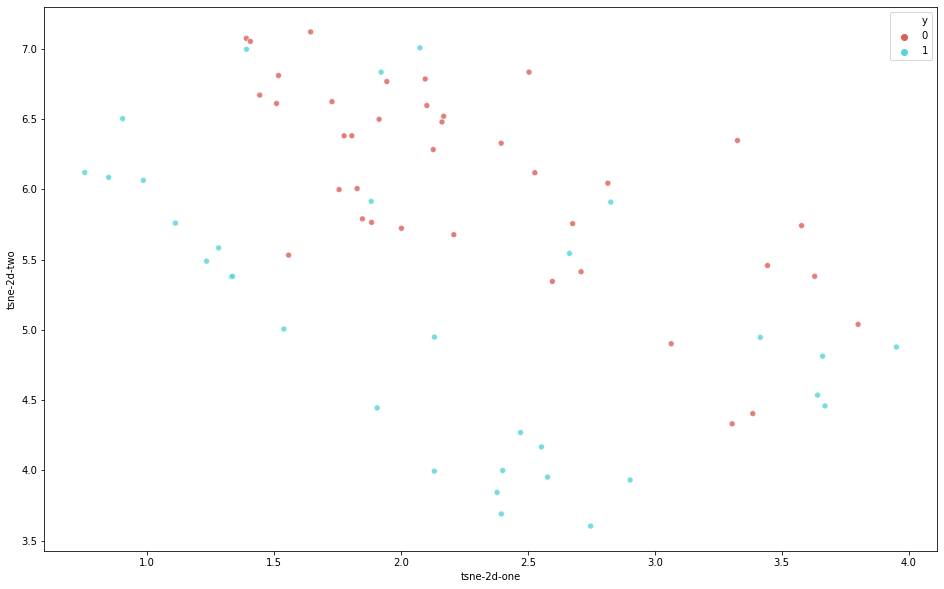

In [114]:
# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(data_stack)

# Plot
df_stack['tsne-2d-one'] = tsne_results[:, 0]
df_stack['tsne-2d-two'] = tsne_results[:, 1]
# Labels
NUM_SAMPLES_PER_LABEL = 32
y = [1] * NUM_SAMPLES[0] + [0] * NUM_SAMPLES[1]
df_stack['y'] = y
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_stack,
    legend="full",
    alpha=0.8
)

### Playground: Multiple t-SNEs

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 68 samples in 0.006s...
[t-SNE] Computed neighbors for 68 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 68 / 68
[t-SNE] Mean sigma: 5.155769
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.987812
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 68 samples in 0.001s...
[t-SNE] Computed neighbors for 68 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 68 / 68
[t-SNE] Mean sigma: 6.876530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.415703
[t-SNE] KL divergence after

[t-SNE] KL divergence after 1000 iterations: 0.311333
[t-SNE] Computing 67 nearest neighbors...
[t-SNE] Indexed 68 samples in 0.001s...
[t-SNE] Computed neighbors for 68 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 68 / 68
[t-SNE] Mean sigma: 13.144868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.460991
[t-SNE] KL divergence after 1000 iterations: 0.427788
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 68 samples in 0.010s...
[t-SNE] Computed neighbors for 68 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 68 / 68
[t-SNE] Mean sigma: 5.155769
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.926735
[t-SNE] KL divergence after 1250 iterations: 0.428849
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 68 samples in 0.001s...
[t-SNE] Computed neighbors for 68 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 68 / 68
[t-SNE] Mean sigma: 6.8765

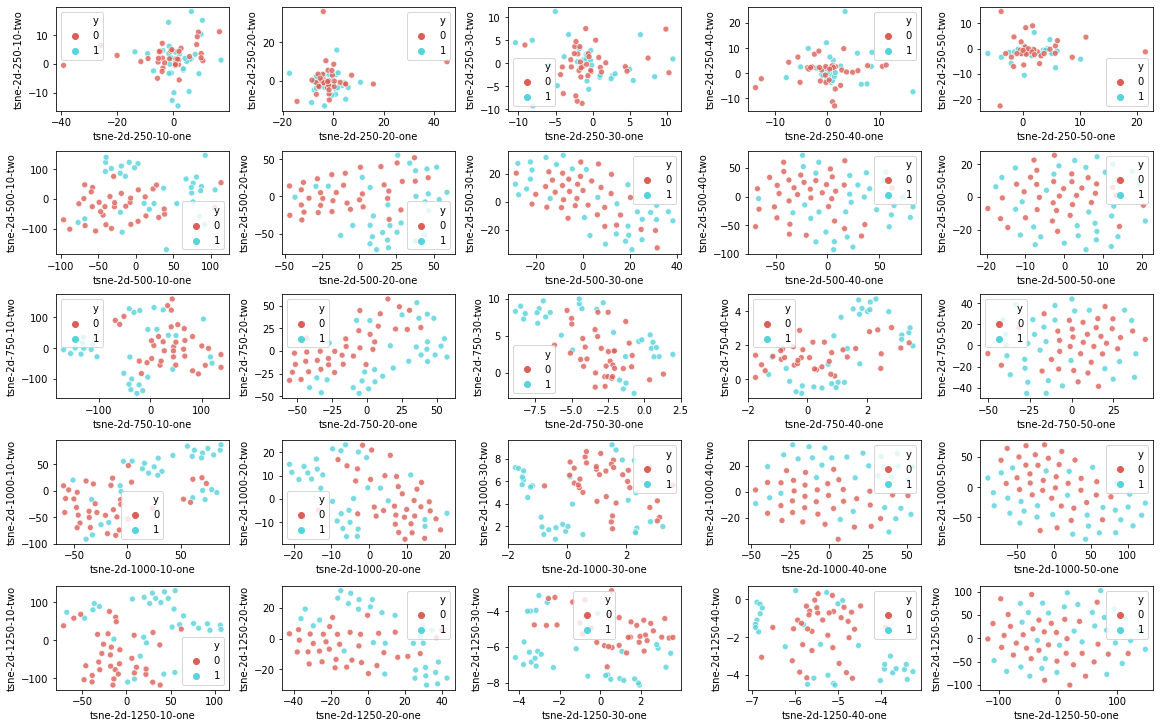

In [69]:
fig = plt.figure(figsize=(16, 10), constrained_layout=True)
spec = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)

for niter in range(250, 1500, 250):
    for perp in range(10, 55, 10):
        # multiple t-SNEs
        tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=niter)
        tsne_results = tsne.fit_transform(data_stack)

        coord_prefix = 'tsne-2d-'
        coord_desc = str(niter) + '-' + str(perp)
        x_coord = coord_prefix + coord_desc + '-one'
        y_coord = coord_prefix + coord_desc + '-two'
        df_stack[x_coord] = tsne_results[:, 0]
        df_stack[y_coord] = tsne_results[:, 1]

        # Labels
        NUM_SAMPLES_PER_LABEL = 60
        y = [1] * NUM_SAMPLES[0] + [0] * NUM_SAMPLES[1]
        df_stack['y'] = y

        niter_offset = int((niter-250)/250)
        perp_offset = int((perp-10)/10)
        fig.add_subplot(spec[niter_offset, perp_offset])
        sns.scatterplot(
            x=x_coord, y=y_coord,
            hue="y",
            palette=sns.color_palette("hls", 2),
            data=df_stack,
            legend="full",
            alpha=0.8,
        )

## PCA Clustering of Samples

Explained variation per principal component: [3.96727124e-01 1.82102588e-01 1.07576162e-01 8.58229514e-02
 4.17241730e-02 3.43273075e-02 2.48915463e-02 2.20821808e-02
 2.11212486e-02 1.48425032e-02 1.14849650e-02 8.59187069e-03
 7.34713089e-03 6.16038086e-03 5.14702079e-03 4.88171932e-03
 4.28397229e-03 3.34816077e-03 2.95096888e-03 2.78048684e-03
 2.40159644e-03 1.98327954e-03 1.32204922e-03 1.11189700e-03
 9.35778949e-04 6.34716518e-04 4.78248577e-04 3.69425802e-04
 3.35231565e-04 2.92998346e-04 2.35415749e-04 2.25497793e-04
 1.79652848e-04 1.54326529e-04 1.37556973e-04 1.14448961e-04
 9.14357850e-05 8.36813054e-05 8.34560971e-05 7.07786440e-05
 5.57352322e-05 5.04398451e-05 4.37869749e-05 4.01389428e-05
 3.79968673e-05 3.41594619e-05 3.15403516e-05 2.65478692e-05
 2.42872684e-05 2.32810563e-05]
Sum: 0.9998038472028525


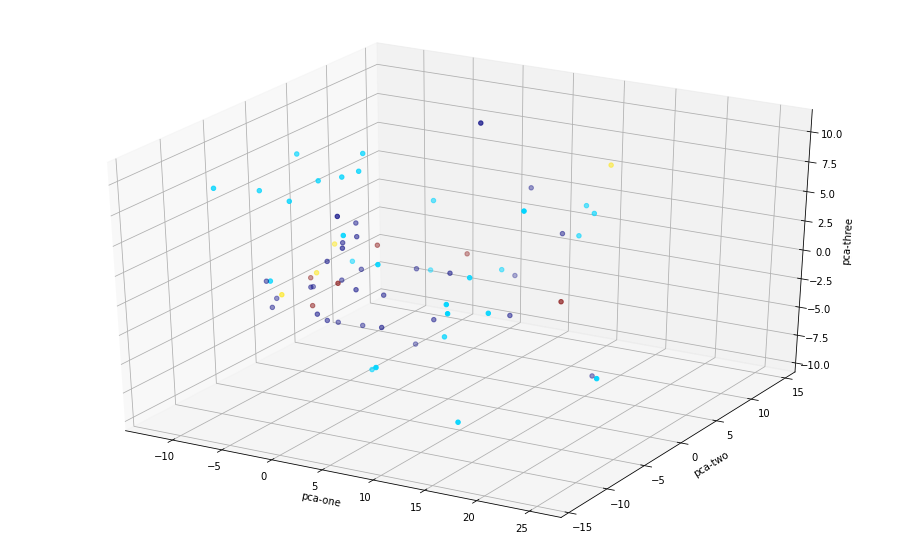

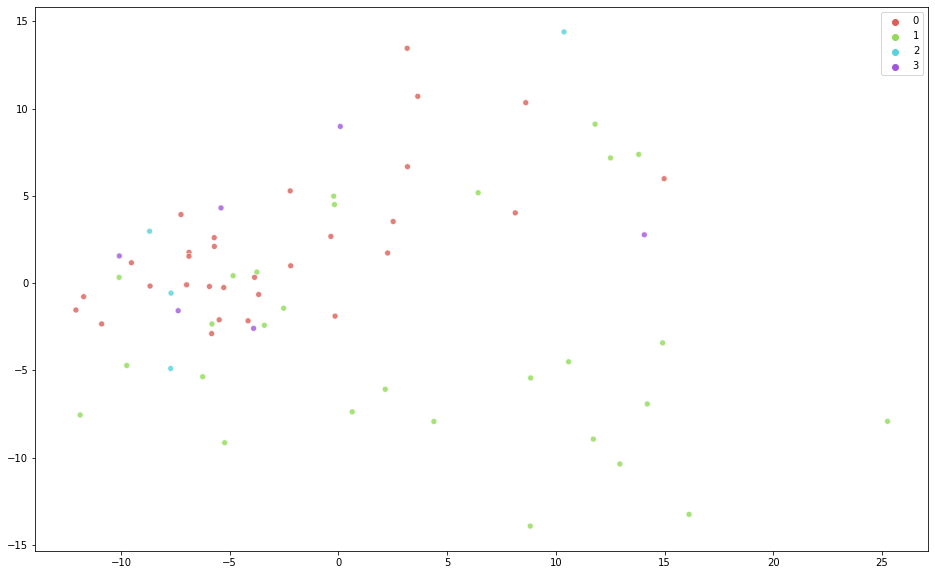

In [68]:
# PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(data_stack)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Sum:', sum(pca.explained_variance_ratio_))
## Explained variation per principal component: [0.1557712  0.11314638 0.08842925]

# Labels
y = [1] * NUM_TRAIN_SAMPLES[0] \
    + [2] * NUM_TEST_SAMPLES[0] \
    + [0] * NUM_TRAIN_SAMPLES[1] \
    + [3] * NUM_TEST_SAMPLES[1]

# Plot: 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y, 
    cmap='jet',
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# Plot: 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    hue=y,
    palette=sns.color_palette("hls", 4),
    legend="full",
    alpha=0.8
)

# Audio Data Augmentation

## Imports

In [ ]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt

## Extract Synchronized Events from Audio/EEG Data

In [58]:
def to_eeg_index(audio_index):
    return int(audio_index / AUDIO_SAMPLE_FREQ * SAMPLE_FREQ)

END = to_eeg_index(INTERVAL * AUDIO_SAMPLE_FREQ) # Produce training samples of uniform length.
data_stack = np.empty((0, int(END * N_COMPONENTS)))

NUM_SAMPLES = []

for l in label:
    print(l)
    event_cts = 0
    for trial in train_number:
        print('####', end=' ')
        ### READ AUDIO DATA
        audio_path = audio_root + audio_prefix + l + str(trial) + audio_suffix
        _, samples = wavfile.read(audio_path)
        envelope = np.abs(signal.hilbert(samples))
        
        ### GET AUDIO EVENTS
        events = np.empty((0, 2))
        in_event = False
        new_event = np.zeros((1, 2))
        hi_threshold_check = False
        for s in range(len(samples)):
            if (not in_event) and (envelope[s] >= AUDIO_EVENT_THRESHOLD_LO):
                in_event = True
                new_event[0][0] = s
            elif (in_event) and (envelope[s] < AUDIO_EVENT_THRESHOLD_LO):
                in_event = False
                new_event[0][1] = s
                event_length = new_event[0][1] - new_event[0][0]
                if hi_threshold_check and event_length >= MIN_AUDIO_EVENT_LENGTH:
                    print(new_event[0][1] - new_event[0][0], end=' ') # Progress bar
                    events = np.concatenate((events, new_event), axis=0)
                    hi_threshold_check = False
            elif (in_event) and (envelope[s] >= AUDIO_EVENT_THRESHOLD_HI):
                hi_threshold_check = True

        ### READ EEG DATA
        cortical_path = train_root + prefix + l + str(trial) + suffix
        df = pd.read_csv(cortical_path)
        
        df = df.drop(columns=df.columns[21:]) # drop raw columns
        df = df.drop(columns=df.columns[0]) # Keep only DTABG filtered components.

        ### EXTRACT EEG EVENTS FROM AUDIO EVENTS
        cts = 0
        for e in events:
            cts += 1
            event_cts += 1
            
            START = to_eeg_index(e[0])

            raw = df.iloc[START:]
            if (raw.equals(raw.dropna()) == False):
                # print('Dropped NaN: %s%d, sample %d' %(l, trial, ct))
                raw = raw.dropna()
            raw = raw.iloc[:END]
            raw_vals = raw.values
            raw_vals = np.reshape(
                raw_vals, (1, int(raw.size)))
            data_stack = np.concatenate((data_stack, raw_vals), axis=0)    
        print('*' + str(cts), end=' ') # Progress bar
        
    NUM_SAMPLES = NUM_SAMPLES + [event_cts]
    print('\n')

df_stack = pd.DataFrame(data_stack)
# print(df_stack.head())
print("data_stack shape: ", data_stack.shape)
print("confirm no NaN:", len(np.argwhere(np.isnan(data_stack))) == 0)  # Should be empty

# Labels: 1=GO, 0=STOP
data_labels = [1] * NUM_SAMPLES[0] + [0] * NUM_SAMPLES[1]
print(NUM_SAMPLES)

GO_
#### 16527.0 18629.0 21290.0 16186.0 18520.0 *5 #### 19671.0 19079.0 19441.0 20263.0 21348.0 *5 #### 20679.0 18952.0 17212.0 19719.0 22074.0 21361.0 19104.0 18370.0 *8 #### 18342.0 21280.0 19607.0 17213.0 17655.0 20472.0 21963.0 *7 #### 20142.0 18255.0 17811.0 16228.0 15868.0 16084.0 19387.0 *7 

STOP_
#### 15316.0 16455.0 11172.0 22738.0 16287.0 17146.0 15945.0 *7 #### 15259.0 10672.0 17323.0 15178.0 18759.0 17747.0 14756.0 *7 #### 13261.0 19250.0 17993.0 12716.0 16161.0 13008.0 15437.0 *7 #### 12851.0 14907.0 10876.0 15949.0 13500.0 14196.0 18813.0 22268.0 *8 #### 15998.0 12313.0 14549.0 18214.0 18271.0 12365.0 17179.0 *7 

data_stack shape:  (68, 2040)
confirm no NaN: True
[32, 36]


### Split Data into Train/Test Sets

In [59]:
NUM_TRAIN_SAMPLES = [28, 30]
NUM_TEST_SAMPLES = [4, 6]

train_df = df_stack.iloc[np.r_[
    0:NUM_TRAIN_SAMPLES[0], 
    NUM_SAMPLES[0]:NUM_SAMPLES[0]+NUM_TRAIN_SAMPLES[1]]]
test_df = df_stack.iloc[np.r_[
    NUM_TRAIN_SAMPLES[0]:NUM_SAMPLES[0],
    NUM_SAMPLES[0]+NUM_TRAIN_SAMPLES[1]:NUM_SAMPLES[0]+NUM_SAMPLES[1]]]
train_stack = train_df.values
test_stack = test_df.values
print(train_stack.shape, test_stack.shape)

train_labels = [1] * NUM_TRAIN_SAMPLES[0] + [0] * NUM_TRAIN_SAMPLES[1]
test_labels = [1] * NUM_TEST_SAMPLES[0] + [0] * NUM_TEST_SAMPLES[1]
print(train_labels, test_labels)

(58, 2040) (10, 2040)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


## Read and Plot Audio Data

sound/STOP_5.wav


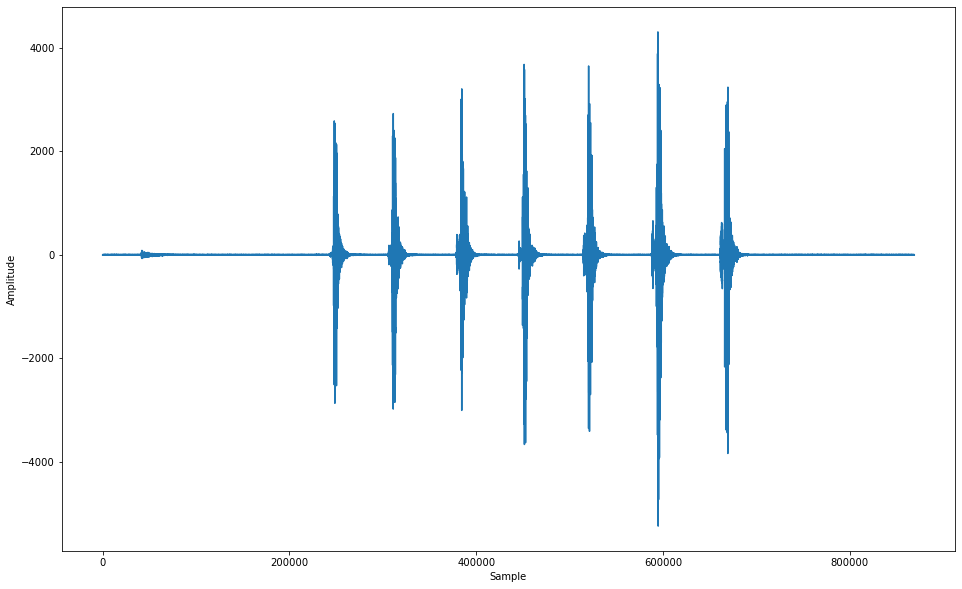

In [17]:
audio_path = audio_root + audio_prefix + label[1] + str(5) + audio_suffix
print(audio_path)
sample_rate, samples = wavfile.read(audio_path)
plt.figure(figsize=(16,10))
plt.plot(samples[:], )
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.show()

## Extract Events from Audio Data

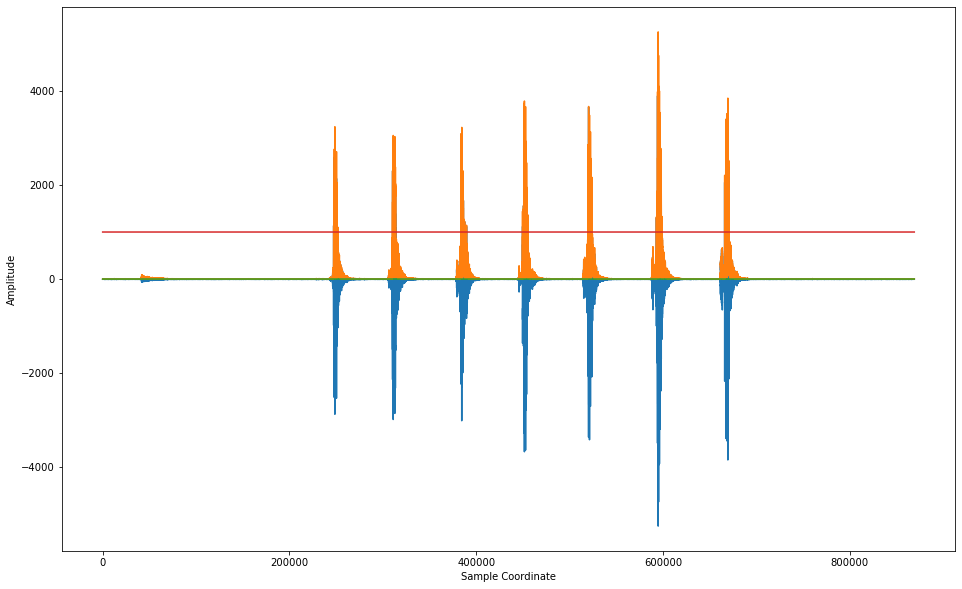

[[246706. 262704.]
 [309800. 322113.]
 [382653. 397202.]
 [449537. 467751.]
 [515569. 533840.]
 [592673. 605038.]
 [665105. 682284.]] 7
15998.0
12313.0
14549.0
18214.0
18271.0
12365.0
17179.0


In [18]:
AUDIO_EVENT_THRESHOLD_LO = 1
AUDIO_EVENT_THRESHOLD_HI = 1000
AUDIO_PLT_LEFT, AUDIO_PLT_RIGHT = 0, len(envelope)
envelope = np.abs(signal.hilbert(samples))
threshold_lo = np.ones(len(envelope)) * AUDIO_EVENT_THRESHOLD_LO
threshold_hi = np.ones(len(envelope)) * AUDIO_EVENT_THRESHOLD_HI

plt.figure(figsize=(16,10))
plt.xlabel('Sample Coordinate'); plt.ylabel('Amplitude')
plt.plot(samples[AUDIO_PLT_LEFT:AUDIO_PLT_RIGHT], label='raw')
plt.plot(envelope[AUDIO_PLT_LEFT:AUDIO_PLT_RIGHT], label='envelope')
plt.plot(threshold_lo[AUDIO_PLT_LEFT:AUDIO_PLT_RIGHT], label='threshold_lo')
plt.plot(threshold_hi[AUDIO_PLT_LEFT:AUDIO_PLT_RIGHT], label='threshold_hi')

plt.show()

events = np.empty((0, 2))
in_event = False
new_event = np.zeros((1, 2))
hi_threshold_check = False

for s in range(len(samples)):
    if (not in_event) and (envelope[s] >= AUDIO_EVENT_THRESHOLD_LO):
        in_event = True
        new_event[0][0] = s
    elif (in_event) and (envelope[s] < AUDIO_EVENT_THRESHOLD_LO):
        in_event = False
        new_event[0][1] = s
        if hi_threshold_check:
            events = np.concatenate((events, new_event), axis=0)
            hi_threshold_check = False
    elif (in_event) and (envelope[s] >= AUDIO_EVENT_THRESHOLD_HI):
        hi_threshold_check = True

print(events, len(events))

for e in events:
    print(e[1]-e[0])

# Inference via KNN in PCA Space

## Imports

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Embed Sample into PCA Space

In [61]:
def embed_pca(raw_eeg, pca_components):
    """
    Embeds RAW_EEG into the PCA representation space given by PCA_COMPONENTS
    """
    return np.dot(pca_components, raw_eeg.T).T

In [62]:
train_stack_pca = embed_pca(train_stack, pca.components_)
print(train_stack_pca.shape)
test_stack_pca = embed_pca(test_stack, pca.components_)
print(test_stack_pca.shape)

(58, 50)
(10, 50)


### Playground: Embedding one sample into PCA Space

In [ ]:
# Procedure for obtaining one sample's representation in PCA space
sample = data_stack[0,:]
print(sample.shape)
sample_rep = np.dot(pca_components, sample)

## KNN Classifier

### Playground: Test Different k-values

In [63]:
k_range = range(1, 51)
scores_list = []
TEST_TO_TRAIN_WEIGHT = 5
total_stack_pca = np.concatenate(
    (np.tile(test_stack_pca,
             (TEST_TO_TRAIN_WEIGHT, 1)),
     train_stack_pca))
total_labels = np.concatenate(
    (np.tile(test_labels,
             (TEST_TO_TRAIN_WEIGHT)),
     train_labels))
print(total_stack_pca.shape)
print(total_labels.shape)
for k_val in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(train_stack_pca, train_labels)
    knn_predict = knn.predict(test_stack_pca)
    scores_list.append(metrics.accuracy_score(test_labels, knn_predict))

print('Maximum accuracy is %f' % (np.amax(scores_list)))

(108, 50)
(108,)
Maximum accuracy is 0.700000


### Plot KNN Results

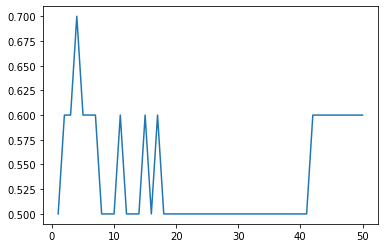

In [64]:
sns.lineplot(x=k_range, y=scores_list)

# Neural Network Approaches

## Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Read in Data to tf.data.Dataset

### Read into Numpy Array

#### Training Data

In [2]:
train_root = 'csvc/'
test_root = 'csvc/'
train_number = range(1, 6)
test_number = range(6, 9)

In [3]:
data_stack = np.empty((0, int(INTERVAL * SAMPLE_FREQ), N_COMPONENTS))
# print(data_stack.shape)

for l in label:
    for trial in train_number:
        path = train_root + prefix + l + str(trial) + suffix
        df = pd.read_csv(path)

#         df = df.drop(columns=df.columns[25:])
#         df = df.drop(columns=df.columns[0:21])  # Only keep raw EEG data.

        df = df.drop(columns=df.columns[21:]) # drop raw columns
        df = df.drop(columns=df.columns[0]) # Keep only DTABG filtered components.
        
#         print(df.shape)

        if (df.equals(df.dropna()) == False):
            print("Dropped NaN: \n", np.argwhere(np.isnan(df.values)))
            df = df.dropna()  # Drop NaN (blank) datapts.

        OFFSET = 1
        while OFFSET < 7:
            START = int(OFFSET * SAMPLE_FREQ)
            END = int(START + SAMPLE_FREQ * INTERVAL)
            OFFSET += 0.5

            raw = df.iloc[START:END]  # Select by row
            raw_vals = raw.values
            raw_vals = np.reshape(
                raw_vals, (1, int(INTERVAL * SAMPLE_FREQ), N_COMPONENTS))
            data_stack = np.concatenate((data_stack, raw_vals), axis=0)
#         print(data_stack.shape)
        
print("data_stack shape: ", data_stack.shape)
print("confirm no NaN:", len(np.argwhere(np.isnan(data_stack))) == 0)  # Should be empty

Dropped NaN: 
 [[723   0]
 [723   1]
 [723   2]
 [723   3]
 [723   4]
 [723   5]
 [723   6]
 [723   7]
 [723   8]
 [723   9]
 [723  10]
 [723  11]
 [723  12]
 [723  13]
 [723  14]
 [723  15]
 [723  16]
 [723  17]
 [723  18]
 [723  19]]
Dropped NaN: 
 [[ 3  0]
 [ 3  1]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 3 11]
 [ 3 12]
 [ 3 13]
 [ 3 14]
 [ 3 15]
 [ 3 16]
 [ 3 17]
 [ 3 18]
 [ 3 19]]
Dropped NaN: 
 [[187   0]
 [187   1]
 [187   2]
 [187   3]
 [187   4]
 [187   5]
 [187   6]
 [187   7]
 [187   8]
 [187   9]
 [187  10]
 [187  11]
 [187  12]
 [187  13]
 [187  14]
 [187  15]
 [187  16]
 [187  17]
 [187  18]
 [187  19]]
Dropped NaN: 
 [[   1    0]
 [   1    1]
 [   1    2]
 [   1    3]
 [   1    4]
 [   1    5]
 [   1    6]
 [   1    7]
 [   1    8]
 [   1    9]
 [   1   10]
 [   1   11]
 [   1   12]
 [   1   13]
 [   1   14]
 [   1   15]
 [   1   16]
 [   1   17]
 [   1   18]
 [   1   19]
 [2160    0]
 [2160    1]
 [2160    2]
 [2160    3]
 [216

#### Testing

In [4]:
test_stack = np.empty((0, int(INTERVAL * SAMPLE_FREQ), N_COMPONENTS))
for l in label:
    for trial in test_number:
        path = test_root + prefix + l + str(trial) + suffix
        df = pd.read_csv(path)

#         df = df.drop(columns=df.columns[25:])
#         df = df.drop(columns=df.columns[0:21])  # Only keep raw EEG data.

        df = df.drop(columns=df.columns[21:]) # drop raw columns
        df = df.drop(columns=df.columns[0]) # Keep only DTABG filtered components.
        
        if (df.equals(df.dropna()) == False):
            print("Dropped NaN: \n", np.argwhere(np.isnan(df.values)))
            df = df.dropna()  # Drop NaN (blank) datapts.

        OFFSET = 1
        while OFFSET < 7:
            START = int(OFFSET * SAMPLE_FREQ)
            END = int(START + SAMPLE_FREQ * INTERVAL)
            OFFSET += 0.5

            raw = df.iloc[START:END]  # Select by row
            raw_vals = raw.values
            raw_vals = np.reshape(
                raw_vals, (1, int(INTERVAL * SAMPLE_FREQ), N_COMPONENTS))
            test_stack = np.concatenate((test_stack, raw_vals), axis=0)
#             print(test_stack.shape)
# df_test = pd.DataFrame(test_stack)
# print(df_stack.head())
# num_rows=num_trials; num_cols=num_datapts
print("test_stack shape: ", test_stack.shape)
print("confirm no NaN:", len(np.argwhere(np.isnan(test_stack))) == 0)  # Should be empty

Dropped NaN: 
 [[  73    0]
 [  73    1]
 [  73    2]
 [  73    3]
 [  73    4]
 [  73    5]
 [  73    6]
 [  73    7]
 [  73    8]
 [  73    9]
 [  73   10]
 [  73   11]
 [  73   12]
 [  73   13]
 [  73   14]
 [  73   15]
 [  73   16]
 [  73   17]
 [  73   18]
 [  73   19]
 [2232    0]
 [2232    1]
 [2232    2]
 [2232    3]
 [2232    4]
 [2232    5]
 [2232    6]
 [2232    7]
 [2232    8]
 [2232    9]
 [2232   10]
 [2232   11]
 [2232   12]
 [2232   13]
 [2232   14]
 [2232   15]
 [2232   16]
 [2232   17]
 [2232   18]
 [2232   19]]
Dropped NaN: 
 [[ 9  0]
 [ 9  1]
 [ 9  2]
 [ 9  3]
 [ 9  4]
 [ 9  5]
 [ 9  6]
 [ 9  7]
 [ 9  8]
 [ 9  9]
 [ 9 10]
 [ 9 11]
 [ 9 12]
 [ 9 13]
 [ 9 14]
 [ 9 15]
 [ 9 16]
 [ 9 17]
 [ 9 18]
 [ 9 19]
 [62  0]
 [62  1]
 [62  2]
 [62  3]
 [62  4]
 [62  5]
 [62  6]
 [62  7]
 [62  8]
 [62  9]
 [62 10]
 [62 11]
 [62 12]
 [62 13]
 [62 14]
 [62 15]
 [62 16]
 [62 17]
 [62 18]
 [62 19]]
test_stack shape:  (72, 128, 20)
confirm no NaN: True


#### Labels

In [74]:
# Labels
train_labels = np.concatenate(
    (np.tile([0, 1], (NUM_TRAIN_SAMPLES[0], 1)), # GO
     np.tile([1, 0], (NUM_TRAIN_SAMPLES[1], 1))) # STOP
)
test_labels = np.concatenate(
    (np.tile([0, 1], (NUM_TEST_SAMPLES[0], 1)), # GO
     np.tile([1, 0], (NUM_TEST_SAMPLES[1], 1))) # STOP
)
# [0 1]=GO, [1 0]=STOP

### Create tf.data.Dataset from tensor slices

In [76]:
FULL_DATASET_SIZE = NUM_TRAIN_SAMPLES[0] + NUM_TRAIN_SAMPLES[1]
TRAIN_SIZE = int(FULL_DATASET_SIZE * 0.8)
VALIDATION_SIZE = int(FULL_DATASET_SIZE * 0.2)

TRAIN_BATCH_SIZE = 1
VALIDATION_BATCH_SIZE = 1

full_dataset = tf.data.Dataset.from_tensor_slices(
    (train_stack, train_labels)
).shuffle(FULL_DATASET_SIZE)

train_dataset = full_dataset.take(TRAIN_SIZE).batch(TRAIN_BATCH_SIZE)
validation_dataset = full_dataset.skip(TRAIN_SIZE).take(VALIDATION_SIZE).batch(VALIDATION_BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_stack, test_labels))
TEST_SHUFFLE_BUFFER = NUM_TEST_SAMPLES[0] + NUM_TEST_SAMPLES[1]
TEST_BATCH_SIZE = 1
test_dataset = test_dataset.shuffle(TEST_SHUFFLE_BUFFER).batch(TEST_BATCH_SIZE)

In [77]:
print(train_dataset, validation_dataset, test_dataset)

<BatchDataset shapes: ((None, 2040), (None, 2)), types: (tf.float64, tf.int32)> <BatchDataset shapes: ((None, 2040), (None, 2)), types: (tf.float64, tf.int32)> <BatchDataset shapes: ((None, 2040), (None, 2)), types: (tf.float64, tf.int32)>


## Build the Model with Keras

### A Basic Convolutional Neural Network

In [85]:
input_shape = (int(SAMPLE_FREQ * INTERVAL), N_COMPONENTS, 1)
raw_shape = (2040, 1)
inputs = keras.Input(shape=raw_shape)
# A proposed architecture is to use recurrent first to "summarize,"
    # No need for embedding layer in recurrent subnetwork?
# then use convolutional to classify.

# reshape
reshape = layers.Reshape((int(SAMPLE_FREQ * INTERVAL), N_COMPONENTS, 1), input_shape=raw_shape)
first_conv = layers.Conv2D(16, 3, activation='relu')
first_pool = layers.MaxPool2D(pool_size=(2, 1))
second_conv = layers.Conv2D(32, 3, activation='relu')
second_pool = layers.MaxPool2D(pool_size=(2, 1))
third_conv = layers.Conv2D(64, 3, activation='relu')
flattener = layers.Flatten()
first_dense = layers.Dense(64, activation='relu')
second_dense = layers.Dense(16, activation='relu')
third_dense = layers.Dense(2)

outputs = third_dense(
    second_dense(first_dense(
        flattener(
            third_conv(
                second_pool(second_conv(
                    first_pool(first_conv(reshape(inputs))))))))))

model = keras.Model(inputs=inputs, outputs=outputs, name='simple_conv')
model.summary()

Model: "simple_conv"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2040, 1)]         0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 102, 20, 1)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 18, 16)       160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 18, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 14, 64)        

### A Basic Recurrent Neural Network

In [98]:
input_shape = (int(SAMPLE_FREQ * INTERVAL), N_COMPONENTS)
raw_shape = (2040,1)
inputs = keras.Input(shape=raw_shape)

reshape = layers.Reshape(input_shape, input_shape=raw_shape)
recurr_layer = layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1)
first_dense = layers.Dense(64, activation='sigmoid')
result_dense = layers.Dense(2, activation='sigmoid')

outputs = result_dense(
        first_dense(
            recurr_layer(reshape(inputs))))

model = keras.Model(inputs=inputs, outputs=outputs, name='simple_lstm')
model.summary()

Model: "simple_lstm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 2040, 1)]         0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 102, 20)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                21760     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 130       
Total params: 26,050
Trainable params: 26,050
Non-trainable params: 0
_________________________________________________________________


### A Recurrent-->Convolutional Neural Network

### Compile Model

In [99]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train Model

In [ ]:
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=validation_dataset)

Epoch 1/10
46/46 [==============================] - 54s 1s/step - loss: 0.7093 - accuracy: 0.4565 - val_loss: 0.6931 - val_accuracy: 0.5455
Epoch 2/10
46/46 [==============================] - 53s 1s/step - loss: 0.6599 - accuracy: 0.8478 - val_loss: 0.6541 - val_accuracy: 0.7273
Epoch 3/10
46/46 [==============================] - 53s 1s/step - loss: 0.6859 - accuracy: 0.6304 - val_loss: 0.6244 - val_accuracy: 0.8182
Epoch 4/10
46/46 [==============================] - 52s 1s/step - loss: 0.6792 - accuracy: 0.6087 - val_loss: 0.6800 - val_accuracy: 0.6364
Epoch 5/10
46/46 [==============================] - 58s 1s/step - loss: 0.6629 - accuracy: 0.6739 - val_loss: 0.6554 - val_accuracy: 0.7273
Epoch 6/10
46/46 [==============================] - 56s 1s/step - loss: 0.6603 - accuracy: 0.6739 - val_loss: 0.6419 - val_accuracy: 0.7273
Epoch 7/10
46/46 [==============================] - 53s 1s/step - loss: 0.6569 - accuracy: 0.6957 - val_loss: 0.7425 - val_accuracy: 0.3636
Epoch 8/10
46/46 [==

## Test Model

In [88]:
test_loss, test_acc = model.evaluate(test_dataset)

10/10 [==============================] - 0s 4ms/step - loss: 1.0745 - accuracy: 0.6000
